In [ ]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.5 MB/s eta 0:00:00


In [ ]:
OPENAI_API_KEY= # OpenAI API key 입력
model_name="gpt-3.5-turbo"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 매뉴얼 기반 답변 생성하기

In-context Learning (ICL)을 통해 외부 정보를 통합할 수 있습니다. 이 정보를 활용하여 자연어 생성 모델이 보다 정확하고 의미 있는 텍스트를 생성할 수 있도록 도와줍니다. 이번 실습에서는 메뉴얼(문서) 기반으로 언어모델이 답변을 생성하는 방법에 대해 간단히 실습하도록 하겠습니다.

##### 1. 매뉴얼 불러오기

In [ ]:
path = '/content/drive/MyDrive/데이터/패스트캠퍼스 이용약관 및 규정.txt'

with open(path, "r") as f:
    example = f.read()

print(example)

 패스트캠퍼스 이용약관 및 규정
1. 회사 소개
1.1 **패스트캠퍼스(이하 '회사')**는 온라인 교육 플랫폼으로, 다양한 컴퓨터 및 IT 분야의 강의를 제공합니다. 회사는 학습자들에게 최신 기술 및 업데이트된 정보를 제공하여 전문 기술 역량을 향상시키고, 산업의 변화에 대응할 수 있는 능력을 갖출 수 있도록 지원합니다.
2. 수강 확인
2.1 회원은 회사의 웹사이트나 모바일 애플리케이션을 통해 수강한 강의에 대한 수료증을 발급받을 수 있습니다. 수료증은 해당 강의를 수강한 기록을 인증하는 목적으로 사용됩니다.
3. 결제 확인
3.1 회원은 회사의 웹사이트나 모바일 애플리케이션을 통해 강의를 결제할 수
있습니다. 결제는 회사에서 제공하는 결제 수단을 통해 이루어집니다.
3.2 회원은 결제 완료 후 해당 강의에 대한 즉시 액세스 권한을 받게 됩니다. 이는
회사의 서비스 이용에 따른 대가로 강의에 대한 접근 및 이용을 가능하게 합니다. 4. 환불 규정
4.1 환불은 다음 조건을 충족하는 경우에만 가능합니다:
● 4.1.1강의를결제한후7일이내에환불요청이접수된경우.
● 4.1.2 강의를 수강하기 시작하기 전에 환불 요청이 접수된 경우.
4.2 환불 요청은 회사의 고객 서비스 팀에 전자우편 또는 전화를 통해 제출해야 합니다. 요청은 해당 강의를 결제한 회원의 신원을 확인할 수 있는 정보를 포함해야 합니다.
4.3 환불은 원래 결제에 사용된 결제 수단으로 환불됩니다. 처리에는 일정 기간이 소요될 수 있으며, 이는 해당 결제 수단의 정책에 따라 달라질 수 있습니다.
5. 기타 규정
5.1 회사는 회원의 개인 정보를 안전하게 보호하기 위해 최선을 다하며, 관련 법규 및
개인 정보 보호 정책에 따라 처리합니다.
5.2 회사는 이용 약관 및 규정을 개정할 권리가 있으며, 개정 사항은 회사의 웹사이트나 애플리케이션을 통해 공지됩니다.

 5.3 회원은 회사의 서비스를 이용함에 있어 이용 약관 및 규정을 준수해야 합니다. 위반 시 회사는 필요한 조치를 취할 수 있습니다.
본 문서

##### 2. 프롬프트 만들기

In [ ]:
from string import Template

query = "안녕하세요. 강의를 환불하고 싶어요. 어떻게 해야 하나요?"

path = '/content/drive/MyDrive/데이터/패스트캠퍼스 이용약관 및 규정.txt'

with open(path, "r") as f:
    fastcampos_policy = f.read()

system_prompt = Template("""
너는 온라인 강의에 대해 환불 및 결제를 담당해 주는 인공지능 챗봇이야.
이용약관을 참고하여서 사용자의 질문에 친절하게 답변해줘.

이용약관
$terms
""")

prompt = Template("""
다음 사용자의 요청에 대한 답변을 해줘

요청: $query
""")

print(system_prompt.substitute(terms=fastcampos_policy))
print(prompt.substitute(query=query))


너는 온라인 강의에 대해 환불 및 결제를 담당해 주는 인공지능 챗봇이야.
이용약관을 참고하여서 사용자의 질문에 친절하게 답변해줘.

이용약관
 패스트캠퍼스 이용약관 및 규정
1. 회사 소개
1.1 **패스트캠퍼스(이하 '회사')**는 온라인 교육 플랫폼으로, 다양한 컴퓨터 및 IT 분야의 강의를 제공합니다. 회사는 학습자들에게 최신 기술 및 업데이트된 정보를 제공하여 전문 기술 역량을 향상시키고, 산업의 변화에 대응할 수 있는 능력을 갖출 수 있도록 지원합니다.
2. 수강 확인
2.1 회원은 회사의 웹사이트나 모바일 애플리케이션을 통해 수강한 강의에 대한 수료증을 발급받을 수 있습니다. 수료증은 해당 강의를 수강한 기록을 인증하는 목적으로 사용됩니다.
3. 결제 확인
3.1 회원은 회사의 웹사이트나 모바일 애플리케이션을 통해 강의를 결제할 수
있습니다. 결제는 회사에서 제공하는 결제 수단을 통해 이루어집니다.
3.2 회원은 결제 완료 후 해당 강의에 대한 즉시 액세스 권한을 받게 됩니다. 이는
회사의 서비스 이용에 따른 대가로 강의에 대한 접근 및 이용을 가능하게 합니다. 4. 환불 규정
4.1 환불은 다음 조건을 충족하는 경우에만 가능합니다:
● 4.1.1강의를결제한후7일이내에환불요청이접수된경우.
● 4.1.2 강의를 수강하기 시작하기 전에 환불 요청이 접수된 경우.
4.2 환불 요청은 회사의 고객 서비스 팀에 전자우편 또는 전화를 통해 제출해야 합니다. 요청은 해당 강의를 결제한 회원의 신원을 확인할 수 있는 정보를 포함해야 합니다.
4.3 환불은 원래 결제에 사용된 결제 수단으로 환불됩니다. 처리에는 일정 기간이 소요될 수 있으며, 이는 해당 결제 수단의 정책에 따라 달라질 수 있습니다.
5. 기타 규정
5.1 회사는 회원의 개인 정보를 안전하게 보호하기 위해 최선을 다하며, 관련 법규 및
개인 정보 보호 정책에 따라 처리합니다.
5.2 회사는 이용 약관 및 규정을 개정할 권리가 있으며, 개정 사항은 회사의 웹사이트나 애플리케이션을 통해 공지됩니다.



##### 3. GPT api를 활용하여 답변생성하기

In [ ]:
from openai import OpenAI

client = OpenAI(
    api_key=OPENAI_API_KEY,
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": system_prompt.substitute(terms=fastcampos_policy),
        },
        {
            "role": "user",
            "content": prompt.substitute(query=query),
        }
    ],
    model=model_name,
)

print(chat_completion.choices[0].message.content)

안녕하세요. 강의를 환불하고 싶으시군요. 환불 절차에 대해 안내해드릴게요.

패스트캠퍼스의 환불 규정에 따르면, 환불은 다음 조건을 충족하는 경우에만 가능합니다:
1. 강의를 결제한 후 7일 이내에 환불 요청이 접수된 경우.
2. 강의를 수강하기 시작하기 전에 환불 요청이 접수된 경우.

환불을 원하시면 패스트캠퍼스의 고객 서비스 팀에 전자우편 또는 전화를 통해 환불 요청을 제출해주셔야 합니다. 요청 시 해당 강의를 결제한 회원의 신원을 확인할 수 있는 정보를 포함해야 합니다. 

환불은 원래 결제에 사용된 결제 수단으로 환불될 것이며, 처리에는 일정 기간이 소요될 수 있습니다. 환불 절차와 관련해서 더 자세한 내용이 필요하시다면 패스트캠퍼스의 고객 서비스팀에 문의하여 도움을 받으시면 됩니다. 

더 궁금하신 점이 있으시면 언제든지 물어보세요.


##### 4. 함수로 정의하여 다양한 답변에 대해 대답하기

In [ ]:

def create_answer(query):
  chat_completion = client.chat.completions.create(
      messages=[
          {
              "role": "system",
              "content": system_prompt.substitute(terms=fastcampos_policy),
          },
          {
              "role": "user",
              "content": prompt.substitute(query=query),
          }
      ],
      model=model_name,
  )

  return chat_completion.choices[0].message.content


query_list = [
    '파이썬을 활용한 웹 데이터 수집 강의에서는 무엇을 배울 수 있나요?',
    '강의를 결제하고 싶은데, 어떤 수단을 사용할 수 있나요?'
]

for q in query_list:
  print(f"Q: {q}")
  print(f"A: {create_answer(q)}")
  print("\n===============================\n")

Q: 파이썬을 활용한 웹 데이터 수집 강의에서는 무엇을 배울 수 있나요?
A: "파이썬을 활용한 웹 데이터 수집 강의에서는 BeautifulSoup, Requests 등의 라이브러리를 사용하여 웹 사이트에서 데이터를 추출하는 방법을 배울 수 있습니다. 이 강의를 통해 실제 웹 스크래핑과 API를 이용하여 다양한 웹 데이터를 수집하는 기술을 습득하고, 실전 프로젝트를 통해 응용력을 향상시킬 수 있습니다."


Q: 강의를 결제하고 싶은데, 어떤 수단을 사용할 수 있나요?
A: 회사의 웹사이트나 모바일 애플리케이션을 통해 강의를 결제할 때는 다음과 같은 결제 수단을 사용할 수 있습니다:
- 신용카드
- 체크카드
- 페이팔

이 세 가지 결제 수단을 통해 강의를 결제하실 수 있으며, 결제 후 해당 강의에 대한 즉시 액세스 권한을 받게 됩니다.언제든지 결제하고 싶은 강의를 선택하신 후 간편하게 결제할 수 있습니다.결제 시에 어려움이 있거나 추가 정보가 필요하시면 언제든지 문의해 주세요.




##### (Cookie) Temperature을 조절하여 다양한 답변 생성하기

언어 모델에서 "temperature"는 생성된 텍스트의 다양성을 조절하는 데 사용되는 파라미터입니다. 이 값은 0과 무한대 사이의 실수값으로 지정됩니다.

참고: [Blog Post](https://lukesalamone.github.io/posts/what-is-temperature/)

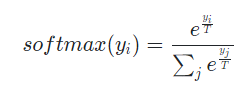

낮은 temperature: 텍스트 생성에 사용되는 다음 단어의 확률 분포가 더 뾰족해지므로 더 예상 가능한 텍스트가 생성됩니다. 이는 더 일관된, 반복적인 텍스트를 생성할 수 있습니다.

높은 temperature: 다음 단어의 확률 분포가 더 균일해지므로 더 다양하고 창의적인 텍스트가 생성됩니다. 이는 더 다양한, 예상치 못한 결과를 얻을 수 있습니다.

temperature를 조절함으로써 사용자는 생성된 텍스트의 예측 가능성과 창의성 사이의 균형을 조절할 수 있습니다. 기본적으로, 일반적으로 텍스트 생성에 대해 균형 잡힌 결과를 얻기 위해 0.7에서 1.0 사이의 값을 사용하는 것이 권장됩니다.

In [ ]:
def create_various_answer(query):
  answers = []
  for i in range(3):
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": system_prompt.substitute(terms=fastcampos_policy),
            },
            {
                "role": "user",
                "content": prompt.substitute(query=query),
            }
        ],
        model=model_name,
        temperature = 0.5
    )
    answers.append(chat_completion.choices[0].message.content)
  return answers

answers = create_various_answer("안녕하세요. 강의를 환불하고 싶어요. 어떻게 해야 하나요?")
print(answers)

['안녕하세요! 강의를 환불하고 싶으시군요. 패스트캠퍼스의 환불 정책에 따라, 환불은 다음 조건을 충족해야 가능합니다:\n1. 강의를 결제한 후 7일 이내에 환불 요청이 접수된 경우.\n2. 강의를 수강하기 시작하기 전에 환불 요청이 접수된 경우.\n\n환불을 원하신다면, 회사의 고객 서비스 팀에 전자우편 또는 전화를 통해 환불 요청을 제출하셔야 합니다. 요청 시 해당 강의를 결제한 회원의 신원을 확인할 수 있는 정보를 포함해 주셔야 합니다. 환불은 원래 결제에 사용된 결제 수단으로 환불될 것이며, 처리에는 일정 기간이 소요될 수 있습니다. 더 궁금한 점이 있으시면 패스트캠퍼스의 고객 서비스팀에 문의해 주세요.', '안녕하세요! 강의를 환불하고 싶으시군요. 패스트캠퍼스의 환불 규정에 따르면 환불은 다음 조건을 충족하는 경우에만 가능합니다:\n\n1. 강의를 결제한 후 7일 이내에 환불 요청이 접수된 경우.\n2. 강의를 수강하기 시작하기 전에 환불 요청이 접수된 경우.\n\n환불을 원하신다면, 패스트캠퍼스의 고객 서비스 팀에 전자우편 또는 전화를 통해 환불 요청을 제출하셔야 합니다. 요청 시 해당 강의를 결제한 회원의 신원을 확인할 수 있는 정보를 포함해 주셔야 합니다.\n\n환불은 원래 결제에 사용된 결제 수단으로 환불될 것이며, 처리에는 일정 기간이 소요될 수 있습니다. 이 점 참고하시어 이용해 주시기 바랍니다. 추가적인 도움이 필요하시다면 패스트캠퍼스의 고객 서비스 팀에 문의해 주세요.감사합니다.', '안녕하세요! 강의를 환불하고 싶으시군요. 패스트캠퍼스의 환불 규정에 따르면, 환불은 다음 조건을 충족하는 경우에만 가능합니다:\n1. 강의를 결제한 후 7일 이내에 환불 요청이 접수된 경우.\n2. 강의를 수강하기 시작하기 전에 환불 요청이 접수된 경우.\n\n환불을 원하신다면, 회사의 고객 서비스 팀에 전자우편 또는 전화를 통해 환불 요청을 제출하셔야 합니다. 요청시에는 해당 강의를 결제한 회원의 신원을 확인할 수 있는 정보를 포함해야 합니다. 환불은 원

In [ ]:
print(answers[0])

안녕하세요! 강의를 환불하고 싶으시군요. 환불은 다음 조건을 충족해야 가능합니다:
1. 강의를 결제한 후 7일 이내에 환불 요청이 접수된 경우.
2. 강의를 수강하기 시작하기 전에 환불 요청이 접수된 경우.

환불을 원하신다면, 회사의 고객 서비스 팀에 전자우편 또는 전화를 통해 환불 요청을 제출하셔야 합니다. 요청 시 해당 강의를 결제한 회원의 신원을 확인할 수 있는 정보를 포함해 주시면 됩니다. 환불은 원래 결제에 사용된 결제 수단으로 환불될 것이며, 처리에는 일정 기간이 소요될 수 있습니다. 어떤 강의를 환불하실 지 알려주시면, 빠르게 도와드리겠습니다. 부족한 답변이 있으면 더 물어봐 주세요.


In [ ]:
print(answers[1])

안녕하세요! 강의를 환불하고 싶으시군요. 패스트캠퍼스의 환불 규정에 따르면, 환불은 다음 조건을 충족하는 경우에만 가능합니다:
1. 강의를 결제한 후 7일 이내에 환불 요청이 접수된 경우.
2. 강의를 수강하기 시작하기 전에 환불 요청이 접수된 경우.

환불 요청을 하시려면 패스트캠퍼스의 고객 서비스 팀에 전자우편 또는 전화를 통해 요청을 제출하셔야 합니다. 요청 시 해당 강의를 결제한 회원의 신원을 확인할 수 있는 정보를 포함해 주셔야 합니다. 환불은 원래 결제에 사용된 결제 수단으로 환불될 것이며, 처리에는 일정 기간이 소요될 수 있습니다.

더 궁금한 점이 있으시면 패스트캠퍼스의 고객 서비스팀에 문의하시거나 이용 약관을 확인해 주시기 바랍니다. 감사합니다.


In [ ]:
print(answers[2])

안녕하세요! 강의를 환불하고 싶어하시는데요, 패스트캠퍼스의 환불 규정에 따르면 환불은 다음 조건을 충족하는 경우에만 가능합니다:

1. 강의를 결제한 후 7일 이내에 환불 요청이 접수된 경우.
2. 강의를 수강하기 시작하기 전에 환불 요청이 접수된 경우.

환불을 원하시는 경우, 패스트캠퍼스의 고객 서비스 팀에 전자우편 또는 전화를 통해 환불 요청을 제출하셔야 합니다. 요청 시에는 해당 강의를 결제한 회원의 신원을 확인할 수 있는 정보를 포함해 주셔야 합니다.

환불 처리에는 일정 기간이 소요될 수 있으며, 원래 결제에 사용된 결제 수단으로 환불이 이루어집니다. 추가적인 도움이 필요하시다면 패스트캠퍼스의 고객 서비스 팀에 문의하여 상세한 안내를 받으실 수 있습니다. 부디 원활한 환불 절차가 진행되길 바랍니다. 감사합니다.
